<a href="https://colab.research.google.com/github/SiweiLuo/DL_with_Python/blob/master/dimension_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import os

np.random.seed(42)

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)


def save_fig(fig_id,tight_layout=True):
  path = os.path.join(fig_id+".png")
  if tight_layout:
    plt.tight_layout()
  plt.savefig(path,format='png',dpi=300)
  
  

In [0]:
np.random.seed(4)
m = 60
w1,w2 = 0.1,0.3
noise = 0.1

angles = np.random.rand(m)*3*np.pi/2-0.5
x = np.empty((m,3))
x[:,0] = np.cos(angles)+np.sin(angles)/2 + noise*np.random.randn(m)/2
x[:,1] = np.sin(angles)*0.7 + noise*np.random.randn(m)/2
x[:,2] = x[:,0]*w1 +x[:,1]*w2 + noise*np.random.randn(m)

In [0]:
x_centered = x - x.mean(axis=0)
u,s,vt = np.linalg.svd(x_centered)
c1 = vt.T[:,0]
c2 = vt.T[:,1]

In [0]:
m,n = x.shape
m

60

In [0]:
S = np.zeros(x_centered.shape)
S[:n,:n] = np.diag(s)

In [0]:
np.allclose(x_centered,u.dot(S).dot(vt))

True

In [0]:
w2 = vt.T[:,:2]
x2d = x_centered.dot(w2)

In [0]:
x2d_using_svd = x2d

In [0]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
x2d = pca.fit_transform(x)

In [0]:
x2d[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [0]:
x2d_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [0]:
np.allclose(x2d,-x2d_using_svd)

True

In [0]:
x3d_inv = pca.inverse_transform(x2d)

In [0]:
np.allclose(x3d_inv,x)

False

In [0]:
np.mean(np.sum(np.square(x3d_inv - x),axis=1))

0.010170337792848549

In [0]:
x3d_inv_using_svd = x2d_using_svd.dot(vt[:2,:])

In [0]:
np.allclose(x3d_inv_using_svd,x3d_inv-pca.mean_)

True

In [0]:
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [0]:
vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

In [0]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

In [0]:
1-pca.explained_variance_ratio_.sum()

0.011195535570688975

In [0]:
np.square(s)/np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

In [0]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
  def __init__(self,xs,ys,zs,*args,**kwargs):
    FancyArrowPatch.__init__(self,(0,0),(0,0),*args,**kwargs)
    self._verts3d = xs,ys,zs
    
  def draw(self,renderer):
    xs3d,ys3d,zs3d = self._verts3d
    xs,ys,zs = proj3d.proj_transform(xs3d,ys3d,zs3d,renderer.M)
    self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
    FancyArrowPatch.draw(self,renderer)

In [0]:
axes = [-1.8,1.8,-1.3,1.3,-1.0,1.0]

x1s = np.linspace(axes[0],axes[1],10)
x2s = np.linspace(axes[2],axes[3],10)
x1,x2 = np.meshgrid(x1s,x2s)

C = pca.components_
R = C.T.dot(C)
z = (R[0,2]*x1+R[1,2]*x2)/(1-R[2,2])

(-1.0, 1.0)

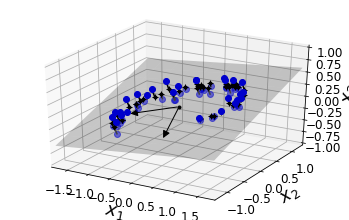

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(6,3.8))
ax = fig.add_subplot(111,projection='3d')


x3d_above = x[x[:,2]>x3d_inv[:,2]]
x3d_below =  x[x[:,2]<=x3d_inv[:,2]]

ax.plot(x3d_below[:,0],x3d_below[:,1],x3d_below[:,2],"bo",alpha=0.5)

ax.plot_surface(x1,x2,z,alpha=0.2,color="k")
np.linalg.norm(C,axis=0)
ax.add_artist(Arrow3D([0, C[0, 0]],[0, C[0, 1]],[0, C[0, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.add_artist(Arrow3D([0, C[1, 0]],[0, C[1, 1]],[0, C[1, 2]], mutation_scale=15, lw=1, arrowstyle="-|>", color="k"))
ax.plot([0], [0], [0], "k.")

for i in range(m):
    if x[i, 2] > x3d_inv[i, 2]:
        ax.plot([x[i][0], x3d_inv[i][0]], [x[i][1], x3d_inv[i][1]], [x[i][2], x3d_inv[i][2]], "k-")
    else:
        ax.plot([x[i][0], x3d_inv[i][0]], [x[i][1], x3d_inv[i][1]], [x[i][2], x3d_inv[i][2]], "k-", color="#505050")
    
ax.plot(x3d_inv[:, 0], x3d_inv[:, 1], x3d_inv[:, 2], "k+")
ax.plot(x3d_inv[:, 0], x3d_inv[:, 1], x3d_inv[:, 2], "k.")
ax.plot(x3d_above[:, 0], x3d_above[:, 1], x3d_above[:, 2], "bo")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])


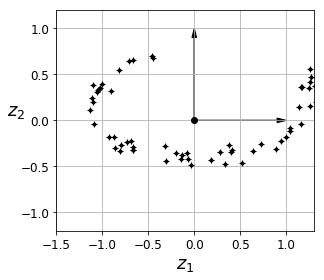

In [0]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')

ax.plot(x2d[:, 0], x2d[:, 1], "k+")
ax.plot(x2d[:, 0], x2d[:, 1], "k.")
ax.plot([0], [0], "ko")
ax.arrow(0, 0, 0, 1, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.arrow(0, 0, 1, 0, head_width=0.05, length_includes_head=True, head_length=0.1, fc='k', ec='k')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.axis([-1.5, 1.3, -1.2, 1.2])
ax.grid(True)
save_fig("dataset_2d_plot")

In [0]:
from sklearn.datasets import make_swiss_roll
x,t = make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)

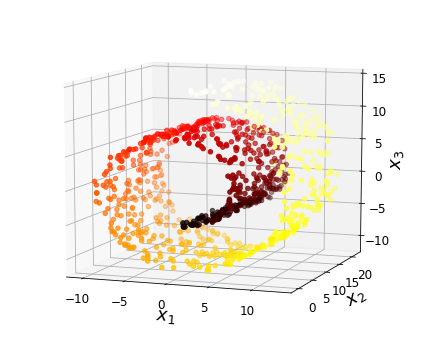

In [0]:
axes = [-11.5,14,-2,23,-12,15]

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111,projection='3d')

ax.scatter(x[:,0],x[:,1],x[:,2],c=t,cmap=plt.cm.hot)
ax.view_init(10,-70)
ax.set_xlabel("$x_1$",fontsize=18)
ax.set_ylabel("$x_2$",fontsize=18)
ax.set_zlabel("$x_3$",fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("swiss_roll_plot")
plt.show()

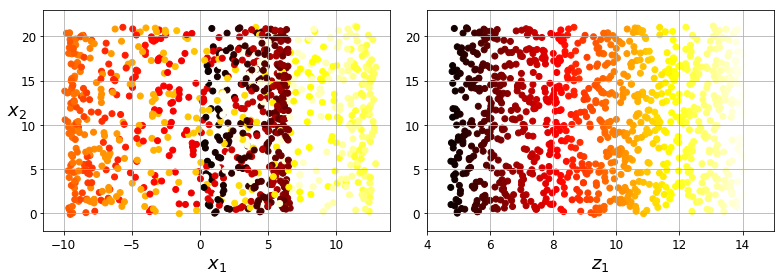

In [0]:

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.scatter(x[:, 0], x[:, 1], c=t, cmap=plt.cm.hot)
plt.axis(axes[:4])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot(122)
plt.scatter(t, x[:, 1], c=t, cmap=plt.cm.hot)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("squished_swiss_roll_plot")
plt.show()

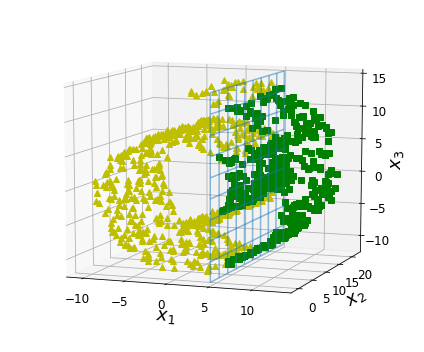

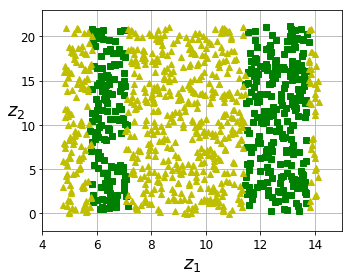

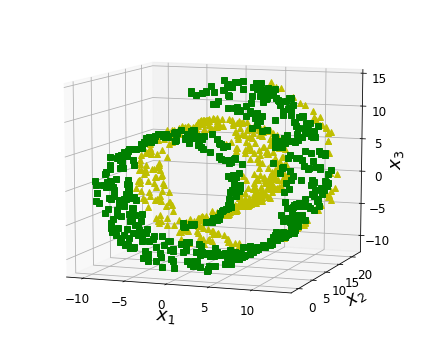

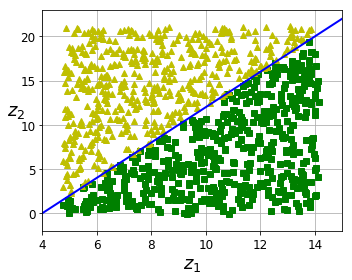

In [0]:
from matplotlib import gridspec

axes = [-11.5, 14, -2, 23, -12, 15]

x2s = np.linspace(axes[2], axes[3], 10)
x3s = np.linspace(axes[4], axes[5], 10)
x2, x3 = np.meshgrid(x2s, x3s)

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = x[:, 0] > 5
X_pos = x[positive_class]
X_neg = x[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot_wireframe(5, x2, x3, alpha=0.5)
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("manifold_decision_boundary_plot1")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], x[positive_class, 1], "gs")
plt.plot(t[~positive_class], x[~positive_class, 1], "y^")
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

save_fig("manifold_decision_boundary_plot2")
plt.show()

fig = plt.figure(figsize=(6, 5))
ax = plt.subplot(111, projection='3d')

positive_class = 2 * (t[:] - 4) > x[:, 1]
X_pos = x[positive_class]
X_neg = x[~positive_class]
ax.view_init(10, -70)
ax.plot(X_neg[:, 0], X_neg[:, 1], X_neg[:, 2], "y^")
ax.plot(X_pos[:, 0], X_pos[:, 1], X_pos[:, 2], "gs")
ax.set_xlabel("$x_1$", fontsize=18)
ax.set_ylabel("$x_2$", fontsize=18)
ax.set_zlabel("$x_3$", fontsize=18)
ax.set_xlim(axes[0:2])
ax.set_ylim(axes[2:4])
ax.set_zlim(axes[4:6])

save_fig("manifold_decision_boundary_plot3")
plt.show()

fig = plt.figure(figsize=(5, 4))
ax = plt.subplot(111)

plt.plot(t[positive_class], x[positive_class, 1], "gs")
plt.plot(t[~positive_class], x[~positive_class, 1], "y^")
plt.plot([4, 15], [0, 22], "b-", linewidth=2)
plt.axis([4, 15, axes[2], axes[3]])
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

save_fig("manifold_decision_boundary_plot4")
plt.show()

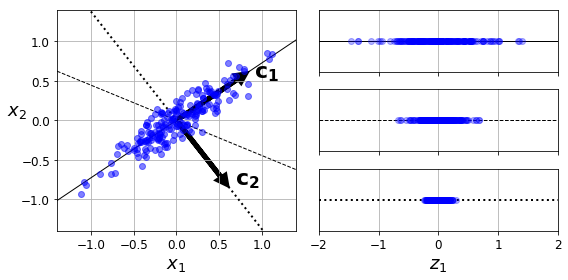

In [0]:
angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(3)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(8,4))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "k-", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "k--", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k:", linewidth=2)
plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.5)
plt.axis([-1.4, 1.4, -1.4, 1.4])
plt.arrow(0, 0, u1[0], u1[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.arrow(0, 0, u3[0], u3[1], head_width=0.1, linewidth=5, length_includes_head=True, head_length=0.1, fc='k', ec='k')
plt.text(u1[0] + 0.1, u1[1] - 0.05, r"$\mathbf{c_1}$", fontsize=22)
plt.text(u3[0] + 0.1, u3[1], r"$\mathbf{c_2}$", fontsize=22)
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$x_2$", fontsize=18, rotation=0)
plt.grid(True)

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "k-", linewidth=1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "k--", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k:", linewidth=2)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("$z_1$", fontsize=18)
plt.grid(True)

save_fig("pca_best_projection")
plt.show()

In [0]:
from six.moves import urllib
try:
  from sklearn.datasets import fetch_openml
  mnist = fetch_openml('mnist_784',version=1)
  mnist.target = mnist.target.astype(np.int64)
except ImportError:
  from sklearn.datasets import fetch_mldata
  mnist = fetch_mldata("MNIST original")

In [0]:
from sklearn.model_selection import train_test_split

x = mnist["data"]
y = mnist["target"]

x_train,x_test,y_train,y_test = train_test_split(x,y)

In [0]:
pac = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d =  np.argmax(cumsum>=0.95)+1

In [0]:
d

1

In [0]:
pca = PCA(n_components=0.95)
x_reduced = pca.fit_transform(x_train)


In [0]:
pca.n_components_

154

In [0]:
np.sum(pca.explained_variance_ratio_)

0.9504334914295708

In [0]:
pca = PCA(n_components=154)
x_reduced = pca.fit_transform(x_train)
x_recovered = pca.inverse_transform(x_reduced)

In [0]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

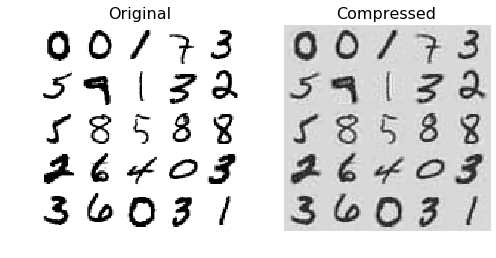

In [0]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(x_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(x_recovered[::2100])
plt.title("Compressed", fontsize=16)

save_fig("mnist_compression_plot")

In [0]:
x_reduced_pca = x_reduced

In [0]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for x_batch in np.array_split(x_train,n_batches):
  inc_pca.partial_fit(x_batch)
  
x_reduced = inc_pca.transform(x_train)

In [0]:
x_recovered_inc_pca = inc_pca.inverse_transform(x_reduced)

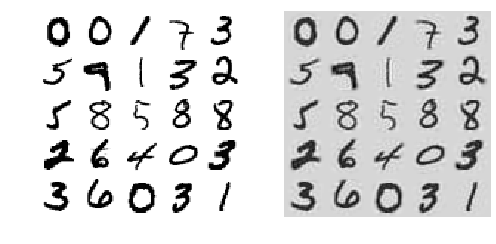

In [0]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(x_train[::2100])
plt.subplot(122)
plot_digits(x_recovered_inc_pca[::2100])
plt.tight_layout()

In [0]:
x_reduced_inc_pca = x_reduced

In [0]:
np.allclose(pca.mean_,inc_pca.mean_)

True

In [0]:
np.allclose(x_reduced_pca,x_reduced_inc_pca)

False

In [0]:
filename = "my_mnist.data"
m,n = x_train.shape

x_mm = np.memmap(filename,dtype='float32',mode='write',shape=(m,n))
x_mm[:] = x_train

In [0]:
del x_mm

In [0]:
x_mm = np.memmap(filename,dtype="float32",mode="readonly",shape=(m,n))
batch_size = m // n_batches

inc_pca = IncrementalPCA(n_components=154,batch_size=batch_size)
inc_pca.fit(x_mm)

IncrementalPCA(batch_size=525, copy=True, n_components=154, whiten=False)

In [0]:
rnd_pca = PCA(n_components=154,svd_solver="randomized",random_state=42)
x_reduced = rnd_pca.fit_transform(x_train)

In [0]:
import time

for n_components in (2,10,154):
  regular_pca = PCA(n_components=n_components)
  inc_pca = IncrementalPCA(n_components=n_components,batch_size=500)
  rnd_pca = PCA(n_components=n_components,random_state=42,svd_solver="randomized")
  
  for pca in (regular_pca,inc_pca,rnd_pca):
    t1 = time.time()
    pca.fit(x_train)
    t2 = time.time()
    

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

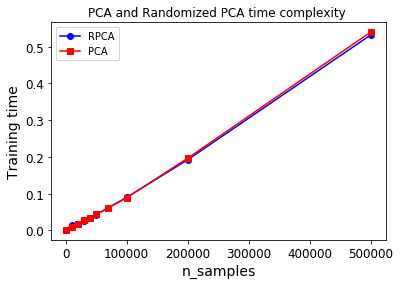

In [0]:
times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]

for n_samples in sizes:
  x = np.random.randn(n_samples,5)
  pca = PCA(n_components=2,svd_solver="randomized",random_state=42)
  t1 = time.time()
  pca.fit(x)
  t2 = time.time()
  times_rpca.append(t2-t1)
  pca = PCA(n_components=2)
  t1 = time.time()
  pca.fit(x)
  t2 = time.time()
  times_pca.append(t2-t1)
  
plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

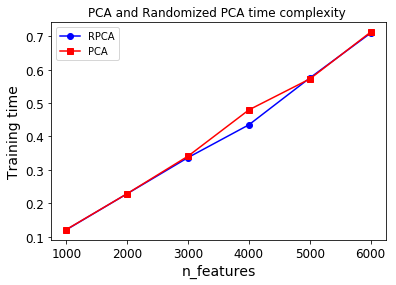

In [0]:
times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components = 2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components = 2)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

In [0]:
x,t = make_swiss_roll(n_samples=1000,noise=0.2,random_state=42)


In [0]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2,kernel="rbf",gamma=0.04)
x_reduced = rbf_pca.fit_transform(x)



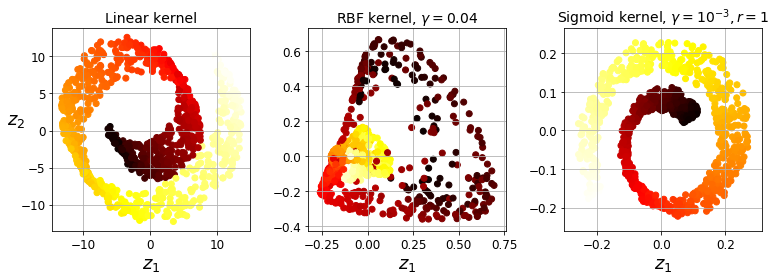

In [0]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2,kernel="linear",fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2,kernel="rbf",gamma=0.04333,fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2,kernel="sigmoid",gamma=0.001,fit_inverse_transform=True)

y = t>6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(x)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

save_fig("kernel_pca_plot")
plt.show()

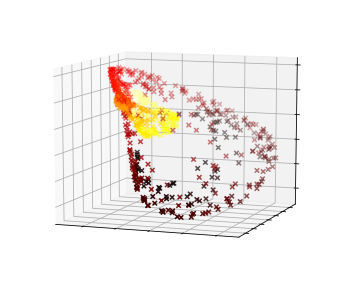

In [0]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

save_fig("preimage_plot", tight_layout=False)
plt.show()

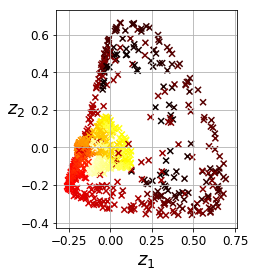

In [0]:
X_reduced = rbf_pca.fit_transform(x)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
    ("kpca",KernelPCA(n_components=2)),
    ("log_reg",LogisticRegression(solver="liblinear"))
])

param_grid = [{
    "kpca__gamma":np.linspace(0.03,0.05,10),
    "kpca__kernel":["rbf","sigmoid"]
}]

grid_search = GridSearchCV(clf,param_grid,cv=3)
grid_search.fit(x,y)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('kpca',
                                        KernelPCA(alpha=1.0, coef0=1,
                                                  copy_X=True, degree=3,
                                                  eigen_solver='auto',
                                                  fit_inverse_transform=False,
                                                  gamma=None, kernel='linear',
                                                  kernel_params=None,
                                                  max_iter=None, n_components=2,
                                                  n_jobs=None,
                                                  random_state=None,
                                                  remove_zero_eig=False,
                                                  tol=0)),
                                       ('log_reg',
                 

In [0]:
rbf_pca = KernelPCA(n_components=2,kernel="rbf",gamma=0.0433,fit_inverse_transform=True)
x_reduced = rbf_pca.fit_transform(x)
x_preimage = rbf_pca.inverse_transform(x_reduced)

In [0]:
from sklearn.metrics import mean_squared_error

mean_squared_error(x,x_preimage)

32.786308795766146

In [0]:
x,t = make_swiss_roll(n_samples=1000,noise=0.2,random_state=41)

In [0]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2,n_neighbors=10,random_state=42)
x_reduced = lle.fit_transform(x)

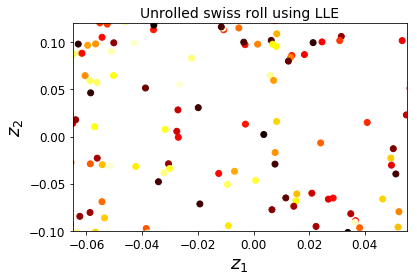

In [0]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
#plt.grid(True)

save_fig("lle_unrolling_plot")
plt.show()

In [0]:
from sklearn.manifold import MDS

mds = MDS(n_components=2,random_state=42)
x_reduced_mds = mds.fit_transform(x)

In [0]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
x_reduced_isomap = isomap.fit_transform(x)

In [0]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2,random_state=42)
x_reduced_tsne = tsne.fit_transform(x)

In [0]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
x_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(x_mnist,y_mnist)
x_reduced_lda = lda.transform(x_mnist)

/usr/local/lib/python3.6/dist-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


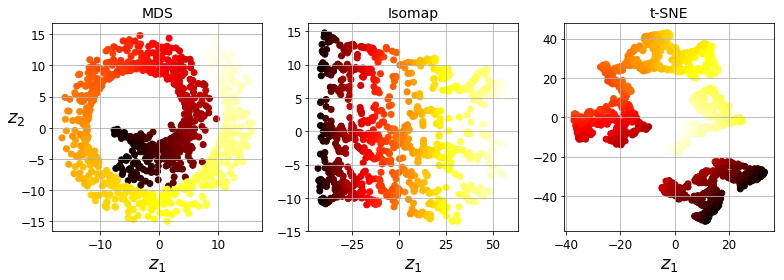

In [0]:
titles = ["MDS","Isomap","t-SNE"]

plt.figure(figsize=(11,4))

for subplot,title,x_reduced in zip((131,132,133),titles,
                                  (x_reduced_mds,x_reduced_isomap,x_reduced_tsne)):
  plt.subplot(subplot)
  plt.title(title,fontsize=14)
  plt.scatter(x_reduced[:,0],x_reduced[:,1],c=t,cmap=plt.cm.hot)
  plt.xlabel("$z_1$",fontsize=18)
  if subplot ==131:
    plt.ylabel("$z_2$",fontsize=18,rotation=0)
  plt.grid(True)
  
save_fig("other_dim_reduction_plot")
plt.show()

In [0]:
def learned_parameters(model):
  return [m for m in dir(model)
         if m.endswith("_") and not m.startswith("_")]

In [0]:
from sklearn.datasets import load_iris

In [0]:
data = load_iris()
x = data.data
y = data.target
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

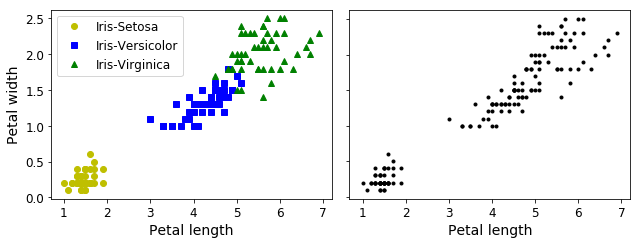

In [0]:
plt.figure(figsize=(9, 3.5))

plt.subplot(121)
plt.plot(x[y==0, 2], x[y==0, 3], "yo", label="Iris-Setosa")
plt.plot(x[y==1, 2], x[y==1, 3], "bs", label="Iris-Versicolor")
plt.plot(x[y==2, 2], x[y==2, 3], "g^", label="Iris-Virginica")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(fontsize=12)

plt.subplot(122)
plt.scatter(x[:, 2], x[:, 3], c="k", marker=".")
plt.xlabel("Petal length", fontsize=14)
plt.tick_params(labelleft=False)

save_fig("classification_vs_clustering_diagram")
plt.show()

In [0]:
from sklearn.mixture import GaussianMixture


In [0]:
y_pred = GaussianMixture(n_components=3,random_state=42).fit(x).predict(x)
mapping = np.array([2,0,1])
y_pred = np.array([mapping[cluster_id] for cluster_id in y_pred])

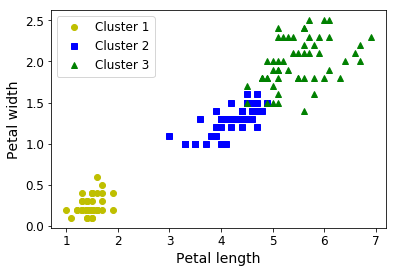

In [0]:

plt.plot(x[y_pred==0, 2], x[y_pred==0, 3], "yo", label="Cluster 1")
plt.plot(x[y_pred==1, 2], x[y_pred==1, 3], "bs", label="Cluster 2")
plt.plot(x[y_pred==2, 2], x[y_pred==2, 3], "g^", label="Cluster 3")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=12)
plt.show()

In [0]:
np.sum(y_pred==y)

145

In [0]:
np.sum(y_pred==y)/len(y_pred)

0.9666666666666667

In [0]:
from sklearn.datasets import make_blobs


In [0]:
blob_centers = np.array(
    [[ 0.2,  2.3],
     [-1.5 ,  2.3],
     [-2.8,  1.8],
     [-2.8,  2.8],
     [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [0]:
x,y = make_blobs(n_samples=2000,centers=blob_centers,cluster_std=blob_std,random_state=7)

In [0]:
def plot_clusters(X, y=None):
    plt.scatter(X[:, 0], X[:, 1], c=y, s=1)
    plt.xlabel("$x_1$", fontsize=14)
    plt.ylabel("$x_2$", fontsize=14, rotation=0)

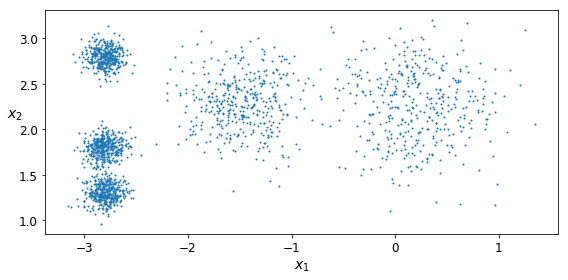

In [0]:

plt.figure(figsize=(8, 4))
plot_clusters(x)
save_fig("blobs_diagram")
plt.show()

In [0]:
from sklearn.cluster import KMeans